In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
animals = pd.read_csv("Animals.csv")
animals.head()

,Unnamed: 0,Animal ID,Animal Type,Birthday,Breed,Color,Fixed upon Intake,Fixed upon Outcome,Gender,Intake Age (days),Intake Condition,Intake DateTime,Intake Type,Name,Outcome Age,Outcome Date,Outcome Subtype,Outcome Type,Stay Duration
0,0,A748291,Dog,06/01/2016,Pit Bull Mix,Black,Intact,Spayed,Female,300,Normal,05/01/2017 02:26:00 PM,Stray,*Madison,365,09/04/2017 12:00:00 AM,Partner,Transfer,125 days 09:34:00.000000000
1,1,A750529,Dog,12/21/2016,Miniature Schnauzer Mix,White/Cream,Intact,Spayed,Female,150,Normal,05/28/2017 01:22:00 PM,Stray,NaN,150,06/01/2017 04:42:00 PM,Partner,Transfer,4 days 03:20:00.000000000
2,2,A730601,Cat,12/07/2015,Domestic Shorthair Mix,Blue Tabby,Intact,Neutered,Male,210,Normal,07/07/2016 12:11:00 PM,Stray,NaN,210,07/08/2016 09:00:00 AM,SCRP,Transfer,0 days 20:49:00.000000000
3,3,A748238,Dog,05/01/2014,Bichon Frise Mix,White,Intact,Neutered,Male,1095,Normal,05/01/2017 10:53:00 AM,Stray,NaN,1095,05/06/2017 03:57:00 PM,Partner,Transfer,5 days 05:04:00.000000000
4,4,A683644,Dog,06/13/2014,Border Collie Mix,Brown/White,Intact,Spayed,Female,28,Nursing,07/13/2014 11:02:00 AM,Owner Surrender,*Zoey,120,11/06/2014 10:06:00 AM,Foster,Adoption,115 days 23:04:00.000000000


In [3]:
animals.shape

(113429, 19)

In [4]:
days = animals["Stay Duration"].str.split(' ', 1, expand=True)

In [5]:
animals["Stay Duration"] = pd.to_numeric(days[0])

In [6]:
animals.dtypes

Unnamed: 0              int64
Animal ID              object
Animal Type            object
Birthday               object
Breed                  object
Color                  object
Fixed upon Intake      object
Fixed upon Outcome     object
Gender                 object
Intake Age (days)       int64
Intake Condition       object
Intake DateTime        object
Intake Type            object
Name                   object
Outcome Age             int64
Outcome Date           object
Outcome Subtype        object
Outcome Type           object
Stay Duration         float64
dtype: object

In [7]:
import plotly.graph_objs as go

In [8]:
animals.head()

,Unnamed: 0,Animal ID,Animal Type,Birthday,Breed,Color,Fixed upon Intake,Fixed upon Outcome,Gender,Intake Age (days),Intake Condition,Intake DateTime,Intake Type,Name,Outcome Age,Outcome Date,Outcome Subtype,Outcome Type,Stay Duration
0,0,A748291,Dog,06/01/2016,Pit Bull Mix,Black,Intact,Spayed,Female,300,Normal,05/01/2017 02:26:00 PM,Stray,*Madison,365,09/04/2017 12:00:00 AM,Partner,Transfer,125.0
1,1,A750529,Dog,12/21/2016,Miniature Schnauzer Mix,White/Cream,Intact,Spayed,Female,150,Normal,05/28/2017 01:22:00 PM,Stray,NaN,150,06/01/2017 04:42:00 PM,Partner,Transfer,4.0
2,2,A730601,Cat,12/07/2015,Domestic Shorthair Mix,Blue Tabby,Intact,Neutered,Male,210,Normal,07/07/2016 12:11:00 PM,Stray,NaN,210,07/08/2016 09:00:00 AM,SCRP,Transfer,0.0
3,3,A748238,Dog,05/01/2014,Bichon Frise Mix,White,Intact,Neutered,Male,1095,Normal,05/01/2017 10:53:00 AM,Stray,NaN,1095,05/06/2017 03:57:00 PM,Partner,Transfer,5.0
4,4,A683644,Dog,06/13/2014,Border Collie Mix,Brown/White,Intact,Spayed,Female,28,Nursing,07/13/2014 11:02:00 AM,Owner Surrender,*Zoey,120,11/06/2014 10:06:00 AM,Foster,Adoption,115.0


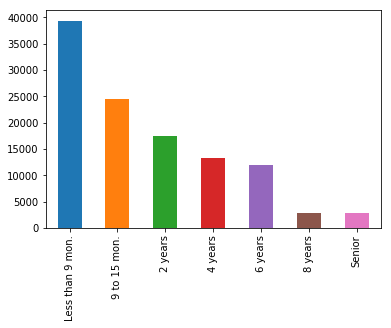

In [115]:
# Create bins in which to place values based age in days;
bins = [0, 270, 450, 730, 1460, 2920, 3650, 7000]

# Create labels for these bins
labels = ["Less than 9 mon.", "9 to 15 mon.", "2 years", "4 years", "6 years", "8 years", "Senior"]

age_series = pd.cut(animals["Outcome Age"], bins, labels=group_labels)

ax = age_series.value_counts(sort=False).plot.bar()
# ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])


# age_series.head()

In [170]:
breed = "Pit Bull Mix"
color = "Black"
animal_unadopted = animals[animals["Outcome Type"] != "Adoption"]
animal_unadopted = animal_unadopted[animal_unadopted["Breed"] == breed]

# animal_unadopted = animal_unadopted[animal_unadopted["Color"] == color]
# age_unadopted = animal_unadopted[animal_unadopted["Breed"] == breed].groupby("Outcome Age").count()
# age_unadopted["Breed"] = age_unadopted["Breed"]/age_unadopted["Breed"].sum()
# age_unadopted["Breed"].sum()
# age_unadopted['Breed'].plot.bar()
# age_unadopted.head()

# Create bins in which to place values based upon age in days
bins = [0, 270, 450, 730, 1460, 2920, 3650, 7000]

# Create labels for these bins
labels = ["Less than 9 mon.", "9 to 15 mon.", "2 years", "4 years", "6 years", "8 years", "Senior"]

age_series = pd.cut(animal_unadopted["Intake Age (days)"], bins, labels=group_labels, include_lowest=True)
animal_unadopted["age_range"] = age_series
animal_unadopted.shape

# animal_unadopted.shape
age_df = animal_unadopted.groupby("age_range").count()["Breed"]
labels = age_df.index.tolist()
counts = age_df.values.tolist()
data = {"x": labels, "y": counts}
data
animal_unadopted[["age_range", "Gender", "Animal Type", "Color", "Stay Duration"]].shape
# df = animals.groupby(pd.cut(animals[""], bins=bins)).val.count()
# df.plot(kind='bar')

(7060, 5)

In [89]:
# plt.hist(animals, bins=bins)

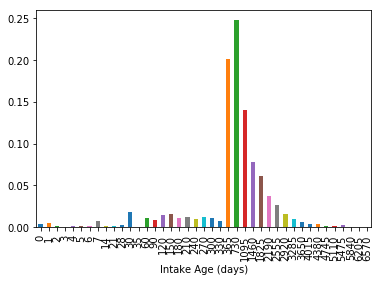

In [44]:
animal_unadopted = animals[animals["Outcome Type"]!="Adoption"]
age_unadopted = animal_unadopted[animal_unadopted["Breed"] == 'Pit Bull Mix'].groupby("Intake Age (days)").count()
age_unadopted["Breed"] = age_unadopted["Breed"]/age_unadopted["Breed"].sum()
age_unadopted["Breed"].sum()
age_unadopted['Breed'].plot.bar()

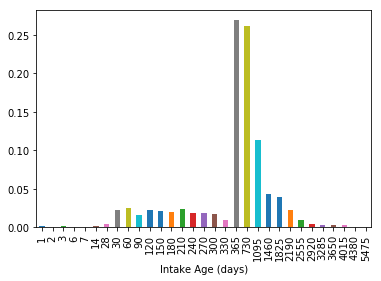

In [45]:
animal_adopted = animals[animals["Outcome Type"]=="Adoption"]
age_adopted = animal_adopted[animal_adopted["Breed"] == 'Pit Bull Mix'].groupby("Intake Age (days)").count()
age_adopted["Breed"] = age_adopted["Breed"]/age_adopted["Breed"].sum()
age_adopted["Breed"].sum()
age_adopted['Breed'].plot.bar()

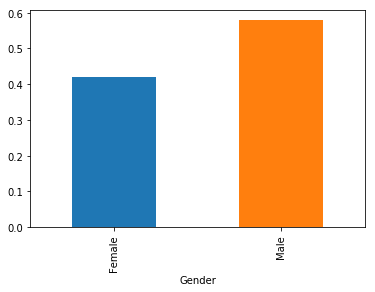

In [171]:
animal_unadopted = animals[animals["Outcome Type"]!="Adoption"]
gender_unadopted = animal_unadopted[animal_unadopted["Breed"] == 'Pit Bull Mix'].groupby("Gender").count()
gender_unadopted["Breed"] = gender_unadopted["Breed"]/gender_unadopted["Breed"].sum()
gender_unadopted["Breed"].sum()
gender_unadopted['Breed'].plot.bar()

In [59]:
delta = age_unadopted["Breed"] - age_adopted["Breed"]
delta = delta.fillna(0)
# delta.plot.bar(figsize=(15,4))
x = delta.index.values
y = delta.values

"/age/<breed>"

(41,)

In [ ]:
@app.route("/age/<breed>")
def adopt_by_age(breed):

    animals = pd.read_csv("Animals.csv")

    animal_unadopted = animals[animals["Outcome Type"]!="Adoption"]
    age_unadopted = animal_unadopted[animal_unadopted["Breed"] == 'Pit Bull Mix'].groupby("Intake Age (days)").count()
    age_unadopted["Breed"] = age_unadopted["Breed"]/age_unadopted["Breed"].sum()
    
    animal_adopted = animals[animals["Outcome Type"]=="Adoption"]
    age_adopted = animal_adopted[animal_adopted["Breed"] == 'Pit Bull Mix'].groupby("Intake Age (days)").count()
    age_adopted["Breed"] = age_adopted["Breed"]/age_adopted["Breed"].sum()
    age_adopted["Breed"].sum()


    delta = age_unadopted["Breed"] - age_adopted["Breed"]
    delta = delta.fillna(0)
    x = delta.index.values
    y = delta.values
    
    data = {
        "x": x,
        "y": y,
        "title": "Age vs Adoptability"
    }

    return jsonify(data)

In [10]:
# for x in animals["Stay Duration"]:
#     if x > 0:
    
        
        
# fig = go.FigureWidget(
#     data=[
#         dict(
#             type='scatterg1',
#             x=animals['Stay Duration'],
#             y=animals['Intake Type'],
            
#         )
#     ],
# )


# fig

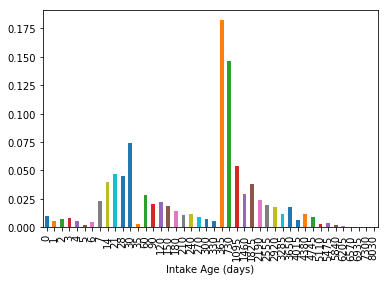

In [62]:
color = "Black"

animal_unadopted = animals[animals["Outcome Type"]!="Adoption"]
age_unadopted = animal_unadopted[animal_unadopted["Color"] == color].groupby("Intake Age (days)").count()
age_unadopted["Color"] = age_unadopted["Color"]/age_unadopted["Color"].sum()

age_unadopted['Color'].plot.bar()

In [ ]:
@app.route("/color/<breed>")
def adopt_by_age(color):

    animals = pd.read_csv("Animals.csv")

    animal_unadopted = animals[animals["Outcome Type"]!="Adoption"]
    age_unadopted = animal_unadopted[animal_unadopted["Color"] == color].groupby("Intake Age (days)").count()
    age_unadopted["Color"] = age_unadopted["Color"]/age_unadopted["Color"].sum()
    
    animal_adopted = animals[animals["Outcome Type"]=="Adoption"]
    age_adopted = animal_adopted[animal_adopted["Color"] == color].groupby("Intake Age (days)").count()
    age_adopted["Color"] = age_adopted["Color"]/age_adopted["Color"].sum()
    age_adopted["Color"].sum()


    delta = age_unadopted["Color"] - age_adopted["Color"]
    delta = delta.fillna(0)
    x = delta.index.values
    y = delta.values
    
    data = {
        "x": x,
        "y": y,
        "title": "Color vs Adoptability"
    }

    return jsonify(data)